# PH1050 Problem Set 4
Name: S Sriniketh Desikan
Roll No.: EP23B051

In [12]:
import matplotlib.pyplot as plt
import math as mt
import scipy
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np

### Problem 1
Given the three data points (x, y) = (1.0, 8.0), (2.1, 20.6) and (5.0, 13.7), write a program to return the value of y for any arbitrary x in the range [1.0, 5.0] using two-point linear interpolation. The program should exit if x is outside this range.

Plotting the data using SciPy

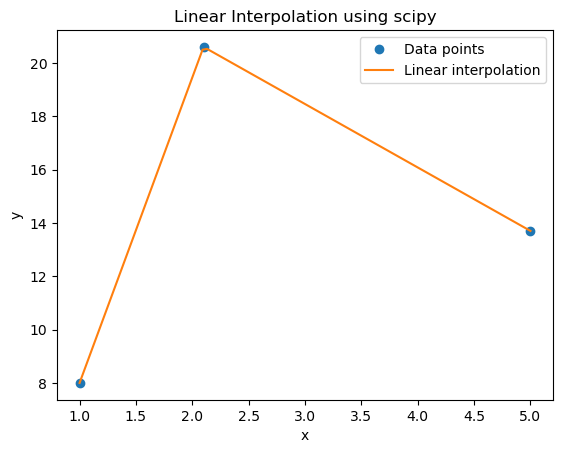

In [16]:
x=np.array([1.0,2.1,5.0])
y=np.array([8.0,20.6,13.7])
flin=interp1d(x,y,kind='linear')
xp=np.linspace(1,5,100)
yp=flin(xp)
plt.plot(x, y, 'o', label='Data points')
plt.plot(xp, yp, '-', label='Linear interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation using scipy')
plt.show()


using the above result,we can define a function to return y

In [19]:
def interpolate_y(i):
    x=np.array([1.0,2.1,5.0])
    y=np.array([8.0,20.6,13.7])
    flin=interp1d(x,y,kind='linear')
    xp=np.linspace(1,5,10000)
    yp=flin(xp)
    l=[]
    if (i<1) or (i>5):
        return 'The value of x is outside the range'
    else:
        for j in xp:
                l.append(abs(i-j))
        return yp[l.index(min(l))]

The above function uses scipy to accomplish the required task. To do so without scipy, we can use the following program

In [ ]:
def interpolation_first(x,x1,x2,y1,y2):
    a=np.ones(len(x))
    y=a*y1+(a*(y2-y1))*(x-a*x1)/(a*(x2-x1))
    return y    

def interpolate_given(i):
    x=np.array([1.0,2.1,5.0])
    y=np.array([8.0,20.6,13.7])
    xp1=np.linspace(1.0,2.1,10000)
    xp2=np.linspace(2.1,5.0,10000)
    xp=np.hstack((xp1,xp2))
    yp1=interpolation_first(xp1,1.0,2.1,8.0,20.6)
    yp2=interpolation_first(xp2,2.1,5.0,20.6,13.7)
    yp=np.hstack((yp1,yp2))
    l=[]
    if (i<1) or (i>5):
        return 'The value of x is outside the range'
    else:
        for j in xp:
                l.append(abs(i-j))
        return yp[l.index(min(l))]

In [24]:
print(interpolate_given(3.23))

17.911491149114912


Example of what the hstack function does

In [27]:
x=np.array([1.0,2.1,5.0])
y=np.array([8.0,20.6,13.7])
print(np.hstack((x,y)))

[ 1.   2.1  5.   8.  20.6 13.7]


The other alternate is to do the extrapolation for a point

In [30]:
def interpolation_second(x,xg,yg):
    for i in range(0,len(xg)):
        if x<=xg[i+1] and x>=xg[i]:
            return (yg[i]+(yg[i+1]-yg[i])*(x-xg[i])/(xg[i+1]-xg[i]))

In [32]:
x=np.array([1.0,2.1,5.0])
y=np.array([8.0,20.6,13.7])
print(interpolation_second(3.23,x,y))

17.911379310344827


This is more accurate but the first method is better for plotting the data as it works with the entire array

### Problem 2
Generalize the above program to input data points from a given ascii data file. The data file will be provided
in the class.

In [ ]:
with open('/Users/sriniketh/Desktop/data_Assign4.txt') as data:
    data=data.read()
    data=data.split()
x=[]
y=[]
for i in range(0,int(len(data)*0.5)):
    x.append(float(data[2*i]))
    y.append(float(data[2*i+1]))



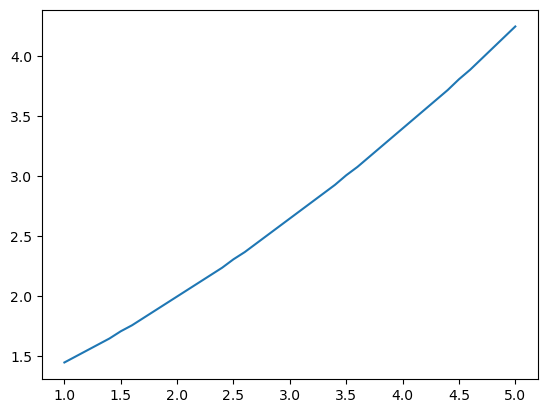

In [38]:
plt.plot(x,y)
plt.show()

The above plot is already linearly interpolated

In [41]:
print(interpolation_second(3.23,x,y))

2.811


Which is in agreement with the given set of values

### Problem 3
Write a program that implements an n point Lagrange interpolation. Treat n as an input parameter

The aim is to plot a lagrange interpolation given a set of n points
i.e
A list of length n containing nested lists of points


*Just the Lagrange interpolation*

In [110]:
def lagrangeint1(x,y):
  n=len(x)
  xmax=max(x)
  xmin=min(x)
  xp=np.linspace(xmin,xmax,10000)
  yp=np.zeros(len(xp))
  for j in range(0,n,1):
    l=np.ones(len(xp))
    # Here I am reinitializing l to original value for every instance of the loop since l must change from one for every instance of m
    for m in range(0,n,1):
      if m!=j:
        l*=(xp-x[m])/((x[j]-x[m]))
      else:
        continue
    yp=yp+y[j]*l
  plt.plot(x,y,marker='o')
  plt.plot(xp,yp)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Lagrange Interpolation')
  plt.show()

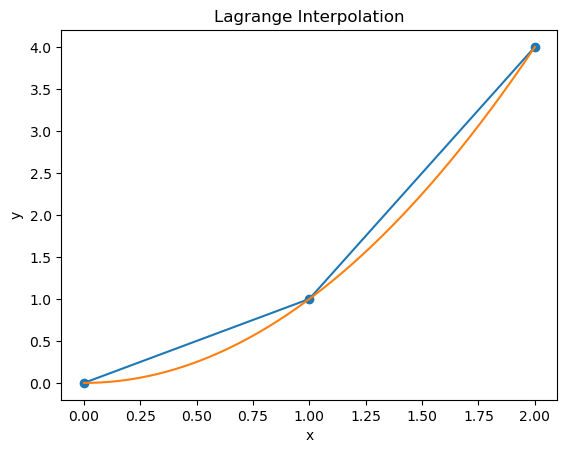

None


In [224]:
print(lagrangeint1([0,1,2],[0,1,4]))

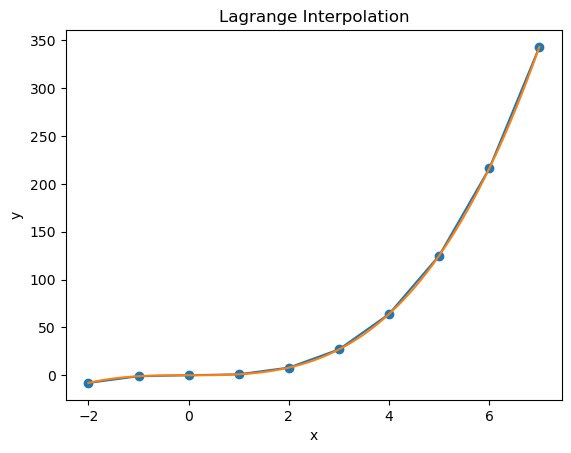

None


In [226]:
print(lagrangeint1(np.arange(-2,8,1),np.arange(-2,8,1)**3))

The above code can return the extrapolated values of y for a given set of points corresponding to each other in 2 lists. To treat n as an input parameter for some general n point lists corresponding to each other, we can write a separate function which uses the above

In [278]:
def lagrange(n,user,x,y):
    if user<x[0] or user>x[-1]:
        print("Please enter input between",x[0],"and",x[-1])
        return None 
    else:
        ans=0
        if n>len(x):
            print("Not enough data points for this Interpolation")
        else:
            for i in range(len(x)-1):
                if i+n-1<len(x):
                    if user>=x[i] and user<=x[i+n-1]: 
                        x_val=x[i:i+n]
                        y_val=y[i:i+n] 
                        break
                    else:
                        x_val=x[len(x)-n:] 
                        y_val=y[len(x)-n:]
        print(x_val,y_val)

for k in range(n): 
    output=y_val[k]
    for l in range(n): 
        if l!=k:
            output*=(user-x_val[l])/(x_val[k]-x_val[l]) 
    ans+=output

return ans



NameError: name 'y_val' is not defined

In [274]:
#Testing the code using known input-output
n=int(input("Choose the n-points Lagrange Interpolation ")) 
inp=float(input("Enter x input")) 
output_lag=lagrange(n,inp, x_data, y_data) 
print(output_lag)

KeyboardInterrupt: Interrupted by user

### Problem 4
Repeat problem 1 using a second order polynomial. Compare the y values from the linear interpolation with those from the second order polynomial. Plot the polynomial and input the data points.

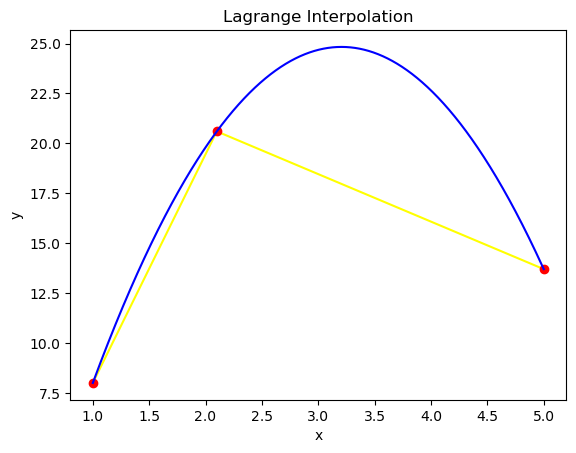

In [193]:
x=np.array([1.0,2.1,5.0])
y=np.array([8.0,20.6,13.7])
plt.plot(x,y,color='pink')
npoint(3,x,y)

Both linear and the polynomial (quadratic) extrapolation have been done. The y values of the quadratic polynomial are higher than that of the linear interpolation.

### Problem 5
Use 1st, 3rd, 5th and 7th order polynomial to interpolate the function
$f(θ) = \frac{cos(3θ)}{(0.4 + (θ − 2)^2)}$
initially calculated in 8 uniform points in the interval θ = [0, π].

In [197]:
def theta(x):
    return (mt.cos(3*x)/(0.4+(x-2)**2))
x=np.linspace(0,mt.pi,8)
y=np.empty((1,))
for i in x:
    y=np.append(y,theta(i))
y=np.delete(y,0)
print(x)
print(y)

[0.         0.44879895 0.8975979  1.34639685 1.7951958  2.24399475
 2.6927937  3.14159265]
[ 0.22727273  0.07929548 -0.55777517 -0.75373792  1.41078673  1.96061655
 -0.2528753  -0.58711846]


KeyboardInterrupt: 

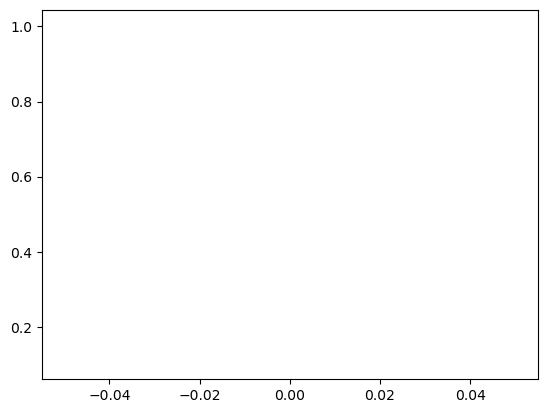

In [262]:
k=np.linspace(0,np.pi,10000)
for i in range(2,10,2):
    for j in k:
        plt.plot(nlagrange(i,x,y,j))
plt.show()
    

Note that the pink extrapolation is the one used for the last interval in the lagrange interpolation

### Problem 6
Use cubic spline routine to solve Problem 4 and compare the result.

In [204]:
def npoint(n, x, y):
    plt.plot(x, y, marker='o', color='red', linestyle='none')  # Plot the original data points

    num_intervals = (len(x) - 1) // n + 1  # Calculate the number of intervals
    for i in range(num_intervals):
        start_index = i * n
        end_index = min(start_index + n + 1, len(x))  # Ensure the end index is within bounds
        if end_index - start_index > 1:  # Ensure there are at least two points to interpolate
            xp, yp = lagrangeint(x[start_index:end_index], y[start_index:end_index])
            plt.plot(xp, yp, color='blue')
    
    plt.xlabel('x')
    plt.ylabel('y')

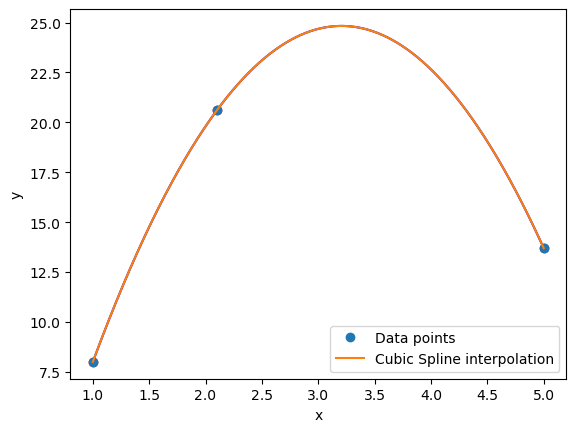

In [206]:
x=np.array([1.0,2.1,5.0])
y=np.array([8.0,20.6,13.7])
flin=CubicSpline(x,y)
xp=np.linspace(1,5,100)
yp=flin(xp)
npoint(3,x,y)
plt.plot(x, y, 'o', label='Data points')
plt.plot(xp, yp, '-', label='Cubic Spline interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The results are that both the curves match almost perfectly

### Problem 7
Use 3rd and 5th order polynomial interpolation to interpolate the function,
$f(x)=\frac{1}{1+25x^2}$
at the n = 11 points xi = −1.0, −0.8, ...., 0.8, 1.0. Compare the results with the cubic spline interpolation.

In [210]:
x=np.arange(-1,1.2,0.2)
print(x)

def fu(x):
    return (1/(1+25*(x**2)))

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]


In [212]:
y=[]
for i in x:
    y.append(fu(i))

In [214]:
print(y)

[0.038461538461538464, 0.05882352941176469, 0.09999999999999998, 0.1999999999999999, 0.49999999999999956, 1.0, 0.5000000000000007, 0.20000000000000026, 0.1000000000000001, 0.058823529411764754, 0.03846153846153849]


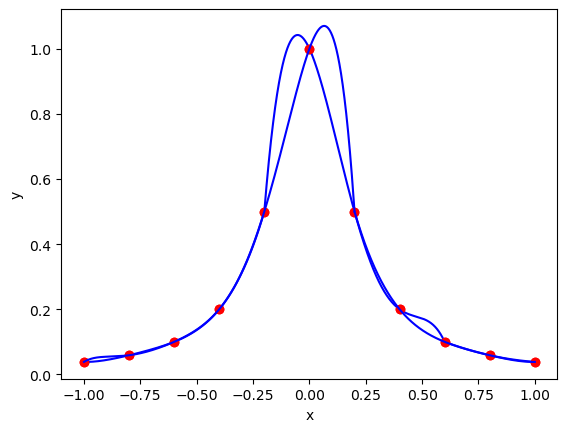

In [216]:
npoint(4,x,y)
npoint(6,x,y)

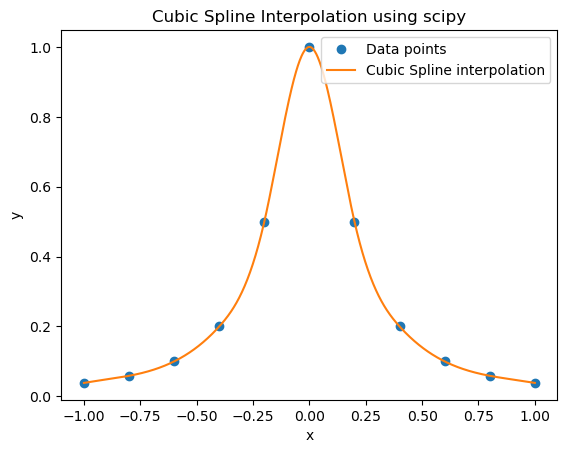

In [218]:
flin=CubicSpline(x,y)
xp=np.linspace(min(x),max(x),1000)
yp=flin(xp)
plt.plot(x, y, 'o', label='Data points')
plt.plot(xp, yp, '-', label='Cubic Spline interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation using scipy')
plt.show()

We can see that we get different results. The cubic spline is more continuous and not as jagged as the above two curves. The polynomial curves are not continuous. Here they seem to be more steep than the cubic spline graph.

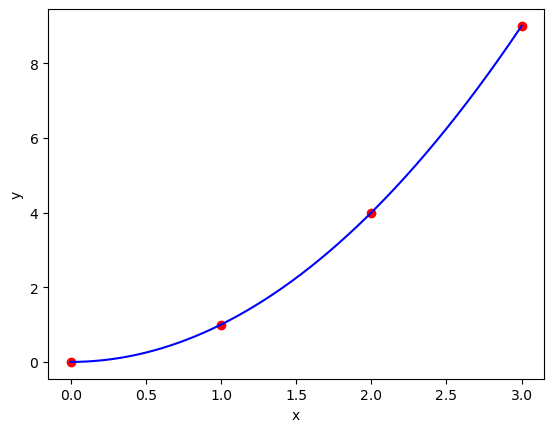

In [221]:
npoint(3,np.arange(0,4,1),np.arange(0,4,1)**2)